In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy as astro
#from scipy import stats
#from scipy.optimize import curve_fit

from astropy.io import fits
from astropy.wcs import WCS

!pip install --upgrade pip
!pip install photutils

from photutils.detection import DAOStarFinder
from astropy.stats import mad_std

from astropy.stats import sigma_clipped_stats
from astropy.stats import SigmaClip

from astropy import units as u
from photutils.background import Background2D, MedianBackground
from photutils.aperture import aperture_photometry, CircularAnnulus, CircularAperture

import csv

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
!pip install --upgrade pip
!pip install astrometry

import matplotlib.pyplot as plt
import csv
import astrometry
import pandas as pd
import astropy.units as u
import numpy as np

import astropy as ap
from astropy.wcs import WCS
from astropy.io import fits

# the 'scales' in the following need to be chosen match to the estimated field-of-view (see https://pypi.org/project/astrometry/)
# these scales are the ones for the image you are working with

solver = astrometry.Solver(
    astrometry.series_5200.index_files(
        cache_directory="astrometry_cache",
        scales={1,3},
    )
)

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
filename = 'a2199.v.combined.fits'
hdu = fits.open(filename)[0]
image_v = hdu.data
hdr = hdu.header



In [4]:
bkg_sigma = mad_std(image_v)  

daofind = DAOStarFinder(fwhm=4.0, threshold=10.0 * bkg_sigma)  

sources = daofind(image_v)  

for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output

print(sources)

 id xcentroid ycentroid sharpness  ... sky    peak      flux       mag    
--- --------- --------- ---------- ... --- --------- --------- -----------
  1 134.84284 19.343266 0.31196312 ...   0 68395.162  588.2704  -6.9239425
  2 995.01721 26.233555 0.39657679 ...   0 317.49917 3.3157361  -1.3014499
  3 937.12031 43.256536 0.40273845 ...   0 639.88773 5.1756735  -1.7849172
  4 1045.5767 52.584177 0.51769637 ...   0 119.32485 1.1570794 -0.15840788
  5 191.93414 56.202044 0.40973127 ...   0 599.81957 3.4089541  -1.3315529
  6 244.59205 59.329288 0.40800896 ...   0 251.27971  1.616986 -0.52176566
  7 808.79649 68.066112 0.45028099 ...   0 1539.8049 15.649201  -2.9862304
  8 326.10995 85.703141 0.44511952 ...   0 401.29534 4.1989845  -1.5578607
  9 1104.9402 92.918583 0.41344818 ...   0 267.89372 2.7130107  -1.0836288
 10 392.71603 97.427479 0.43892747 ...   0 419.88328 4.3572446  -1.5980299
...       ...       ...        ... ... ...       ...       ...         ...
132 227.10635 1270.9693 0

In [5]:
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))  

#radii = [3.0, 4.0, 5.0,7.0,10.0,15.0, 20.0, 25.0, 30.0, 31.0, 32.0]
radii = [3.0, 4.0, 5.0,7.0,10.0,15.0, 20.0, 22.0, 23.0, 25.0]

apertures = [CircularAperture(positions, r=r) for r in radii]

phot_table = aperture_photometry(image_v, apertures)

header = []
for col in phot_table.colnames:

    phot_table[col].info.format = '%.8g'  # for consistent table output
    header = np.append(header,col)

print(phot_table)

# save the output for next notebook
f = open('a2199.v.photometry.csv', 'w')

writer = csv.writer(f)
writer.writerow(header)

for i in range(0,len(phot_table)):
    writer.writerow(phot_table[i])

f.close()

 id  xcenter   ycenter  ... aperture_sum_7 aperture_sum_8 aperture_sum_9
       pix       pix    ...                                             
--- --------- --------- ... -------------- -------------- --------------
  1 134.84284 19.343266 ...      1971812.3      1972432.7      1973685.4
  2 995.01721 26.233555 ...      4202.4575      3955.3463      3752.2956
  3 937.12031 43.256536 ...      27228.622      27127.542      26730.078
  4 1045.5767 52.584177 ...      162.24633      -84.89443     -573.67433
  5 191.93414 56.202044 ...       47815.64      47757.348       47574.36
  6 244.59205 59.329288 ...       10759.17      10616.343      10177.397
  7 808.79649 68.066112 ...      28696.095      28728.901      28686.801
  8 326.10995 85.703141 ...      6267.4485      6173.3722      5781.6467
  9 1104.9402 92.918583 ...      8397.8607      8686.9479      9181.6661
 10 392.71603 97.427479 ...      8347.6324      8193.1449      8207.2112
...       ...       ... ...            ...         

7.0 0.9048802540422182 1.105118600536225


Text(0, 0.5, 'Flux Fraction')

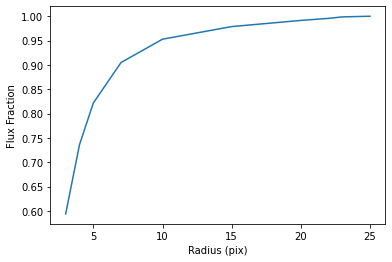

In [6]:
# curve of growth

import pandas as pd
last = len(phot_table.columns)

column = []

for j in range(0,len(phot_table)):
    column.append([])
    for i in range(3,last):
        column[-1].append(phot_table[j][i]/phot_table[j][last-1])

df = pd.DataFrame(column)        
df = df[(df[0]>0.3) & (df[0]<1) & (df[1]>0.3) & (df[1] < 1)]

ap_frac = []
for i in range(3,last):
    ap_frac = np.append(ap_frac,df[i-3].mean())

print(radii[3], ap_frac[3], 1/ap_frac[3])
plt.plot(radii,ap_frac)  
plt.xlabel('Radius (pix)')
plt.ylabel('Flux Fraction')

In [7]:
# read the CSV file and make a list of coordinate pairs for astronometry solver
import re
catalog = pd.read_csv('a2199.v.photometry.csv')

unit = "pix"
x = [sub.replace(unit, "").strip() for sub in catalog['xcenter']]
y = [sub.replace(unit, "").strip() for sub in catalog['ycenter']]

stars = [(x[i],y[i]) for i in range(0,len(x))]

In [ ]:
import astrometry
import logging

logging.getLogger().setLevel(logging.INFO)

# start with values close to the what is given in the header
solution = solver.solve(
    stars=stars,
    size_hint=None,
    position_hint=astrometry.PositionHint(
        ra_deg=247.1,
        dec_deg=39.6,
        radius_deg=1.0),
    solution_parameters=astrometry.SolutionParameters(),
)    

# defines new wcs reference frame using solved for values

if solution.has_match():
    wcs = solution.best_match().astropy_wcs()
    
# it there is a good solution check out correspondence with previous values
    print('The header RA is ',hdr['RA'],'and the solved RA is ',solution.best_match().center_ra_deg)
    print('The header Dec is ',hdr['DEC'],'and the solved Dec is ',solution.best_match().center_dec_deg)
    print('The header plate scale is ',hdr['PIXSCAL1'],'and the solved plate scale is ',solution.best_match().scale_arcsec_per_pixel)

In [9]:
if solution.has_match():
    wcs = solution.best_match().astropy_wcs()
    
# it there is a good solution check out correspondence with previous values
    print('Solved RA is ',solution.best_match().center_ra_deg)
    print('Solved Dec is ',solution.best_match().center_dec_deg)

Solved RA is  247.09141038381526
Solved Dec is  39.57862402738712


In [10]:
# print out the coordinates of the stars that were used for the coordinate solution

if solution.has_match():
    i = 1
    for star in solution.best_match().stars:
        print(f"{i}: {star.ra_deg:.5f} {star.dec_deg:.5f}")
        i += 1

1: 247.04168 39.53690
2: 247.04269 39.51869
3: 247.17487 39.50033
4: 247.15957 39.55129
5: 247.11569 39.65048
6: 247.04096 39.57760
7: 247.19424 39.58771
8: 247.10968 39.51966
9: 247.03807 39.63330
10: 247.12263 39.62624
11: 247.09712 39.57029
12: 247.00045 39.56393
13: 247.02749 39.51610
14: 247.01753 39.58279
15: 247.05714 39.62701
16: 247.07855 39.58409
17: 247.12947 39.52111
18: 247.11135 39.62803
19: 246.99449 39.60395
20: 247.05826 39.53002
21: 247.10470 39.54355
22: 247.16076 39.58000
23: 247.00369 39.51481
24: 247.16349 39.51850
25: 247.10254 39.55766
26: 247.04875 39.64450
27: 247.15026 39.53373
28: 247.11371 39.64954
29: 246.99002 39.63696
30: 247.05936 39.54556
31: 247.10997 39.53199
32: 247.19134 39.60977
33: 247.17026 39.58907
34: 247.04036 39.56474
35: 247.14921 39.60308
36: 247.18525 39.51546
37: 247.05954 39.64836
38: 247.01351 39.54209
39: 247.03224 39.52313
40: 247.01858 39.63650
41: 247.07113 39.50651
42: 247.06330 39.57098
43: 247.17235 39.55652
44: 247.01371 39.591

In [11]:
wcs = solution.best_match().astropy_wcs()
pixels = wcs.all_world2pix(
    [[star.ra_deg, star.dec_deg] for star in solution.best_match().stars],
    0)
print(pixels)

[[1001.40343609  323.33426913]
 [ 994.05921456  169.14381646]
 [ 133.80306807   18.45979155]
 [ 237.48834838  449.58791174]
 [ 527.88229878 1288.07904805]
 [1007.707388    668.17126985]
 [  11.48481311  759.57036389]
 [ 559.90175529  179.68339535]
 [1028.80414219 1139.94312841]
 [ 481.57654194 1083.01748897]
 [ 643.799049    608.17110709]
 [1272.11742105  551.18829912]
 [1093.00902274  146.66927579]
 [1160.61509609  711.43815705]
 [ 904.85383566 1087.20484786]
 [ 764.47741948  724.32190414]
 [ 431.63742721  192.72672964]
 [ 554.6829895  1097.75123633]
 [1312.56311684  890.18568458]
 [ 893.38318682  265.62866942]
 [ 593.43572952  381.94010198]
 [ 231.27737375  692.87060024]
 [1249.13462498  135.02412762]
 [ 209.83006187  171.98436791]
 [ 608.1700157   501.33545233]
 [ 960.06794659 1235.11631902]
 [ 297.20541883  300.48014877]
 [ 540.62467092 1280.09405406]
 [1343.22398049 1169.82824267]
 [ 886.96757385  397.35499073]
 [ 558.71412365  284.14640837]
 [  31.89142622  946.40828124]
 [ 169.5

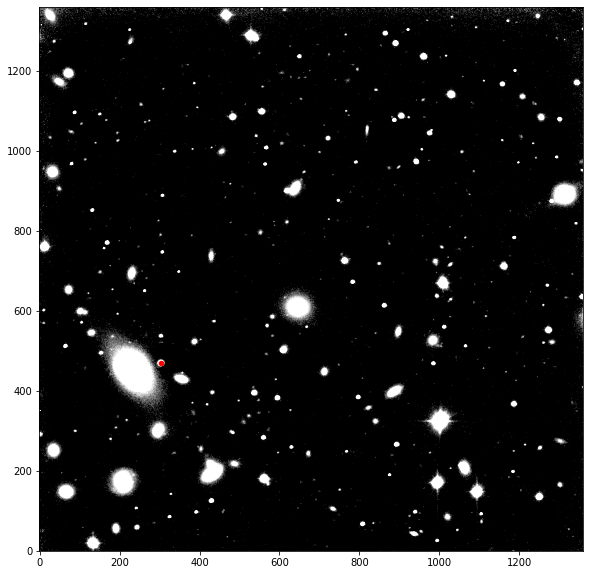

NameError: name 'candle_is' is not defined

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.imshow(image_v, origin='lower', cmap='Greys_r', vmin=5, vmax=50)
i = 75
axs.scatter([pixels[i][0]], [pixels[i][1]], s=20, c="red")
plt.show()

candle_is.append(i)
print(candle_is)

In [65]:
#candle_is = [50, 51, 52]
candle_is.pop()

75

In [13]:
candle_is = [50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 63, 67, 69, 70, 71, 72, 73, 74]
candle_r_mag = [18.71, 18.58, 18.94, 19.02, 20.03, 17.74, 17.83, 18.07, 18.63, 18.61, 20.87, 20.87, 18.00, 18.51, 18.71, 18.83, 19.49, 20.72, 17.26]
candle_g_mag = [20.02, 19.71, 19.29, 20.10, 21.38, 19.16, 18.20, 18.72, 19.87, 19.24, 22.46, 22.11, 18.33, 18.98, 20.13, 19.82, 19.92, 21.85, 17.73]
star_coords = [[star.ra_deg, star.dec_deg] for star in solution.best_match().stars]
for j in range(len(candle_is)):
    i = candle_is[j]
    print(i)
    if j < len(candle_r_mag):
        print(candle_r_mag[j], candle_g_mag[j])
    print(star_coords[i][0], star_coords[i][1])
    print()

50
18.71 20.02
247.18406156962862 39.61226507579885

51
18.58 19.71
247.09923009926945 39.52904043596383

52
18.94 19.29
247.183028074082 39.62739811175117

53
19.02 20.1
247.03215368869778 39.55921243166722

54
20.03 21.38
247.13723866809838 39.636222899609606

57
17.74 19.16
247.1094921540776 39.617371582098265

58
17.83 18.2
246.99652057421437 39.62615310761149

59
18.07 18.72
247.04440894274916 39.55395186206853

60
18.63 19.87
247.1355237323056 39.50972433901169

61
18.61 19.24
247.17602814535914 39.598618680181794

62
20.87 22.46
247.0243787650116 39.567913904837404

63
20.87 22.11
247.12323486914687 39.60659506157316

67
18.0 18.33
247.07546424881636 39.577927911725155

69
18.51 18.98
247.09704536561645 39.644366917212956

70
18.71 20.13
247.14566153751372 39.50831704727415

71
18.83 19.82
247.1490855137004 39.586373468677415

72
19.49 19.92
247.0009399323489 39.577148679947406

73
20.72 21.85
247.13611019292932 39.62908578438522

74
17.26 17.73
247.06354583483042 39.65126674965

In [14]:
arr = []
for j in range(len(candle_is)):
    i = candle_is[j]
    arr.append((star_coords[i][0], star_coords[i][1]))
print(arr)

[(247.18406156962862, 39.61226507579885), (247.09923009926945, 39.52904043596383), (247.183028074082, 39.62739811175117), (247.03215368869778, 39.55921243166722), (247.13723866809838, 39.636222899609606), (247.1094921540776, 39.617371582098265), (246.99652057421437, 39.62615310761149), (247.04440894274916, 39.55395186206853), (247.1355237323056, 39.50972433901169), (247.17602814535914, 39.598618680181794), (247.0243787650116, 39.567913904837404), (247.12323486914687, 39.60659506157316), (247.07546424881636, 39.577927911725155), (247.09704536561645, 39.644366917212956), (247.14566153751372, 39.50831704727415), (247.1490855137004, 39.586373468677415), (247.0009399323489, 39.577148679947406), (247.13611019292932, 39.62908578438522), (247.06354583483042, 39.651266749656294)]


In [15]:
catalog = pd.read_csv('a2199.v.photometry.csv')

unit = "pix"
x = np.array([float(sub.replace(unit, "").strip()) for sub in catalog['xcenter']])
y = np.array([float(sub.replace(unit, "").strip()) for sub in catalog['ycenter']])

#print(x)
#print(pixels[50][0])

corr = 1.105
inst_mag = []
bad_ids = []
for j in range(len(candle_is)):
    i = candle_is[j]
    index = np.argwhere((np.abs(x-pixels[i][0]) < 3.0) & (np.abs(y-pixels[i][1]) < 3.0))
    print(index)
    if len(index) == 0:
        bad_ids.append(j)
    else:
        #print(type(catalog["aperture_sum_3"][index[0][0]]))
        inst_mag.append(-2.5 * np.log10(catalog["aperture_sum_3"][index[0][0]]*corr))

print(inst_mag)

new_candle_r_mag = []
new_candle_g_mag = []

for i in range(len(candle_r_mag)):
    if i in bad_ids:
        continue
    new_candle_r_mag.append(candle_r_mag[i])
    new_candle_g_mag.append(candle_g_mag[i])

[[101]]
[[31]]
[[118]]
[[57]]
[[122]]
[[108]]
[[112]]
[[52]]
[[9]]
[[92]]
[]
[]
[[80]]
[[128]]
[[7]]
[[86]]
[[78]]
[]
[[134]]
[-9.790902435185698, -9.992972129388965, -10.035347689149464, -9.478023281064402, -8.418441749145337, -10.672937036505875, -11.165407996162353, -10.726138453555322, -9.877777892189973, -10.205128844781605, -10.904933155266734, -10.48015054671726, -9.72771409483973, -9.76095875732091, -9.40624227862377, -11.668023838996685]


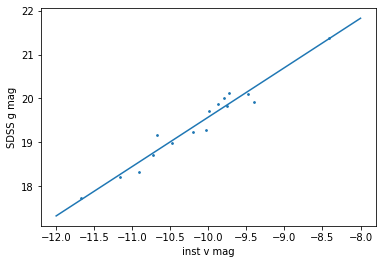

In [18]:
k, b = np.polyfit(inst_mag, new_candle_g_mag, 1)
x = np.linspace(-12, -8, 100)
fig, ax = plt.subplots()
ax.scatter(inst_mag, new_candle_g_mag, s=3)
ax.plot(x, k*x+b)
ax.set_xlabel("inst v mag")
ax.set_ylabel("SDSS g mag")
plt.show()

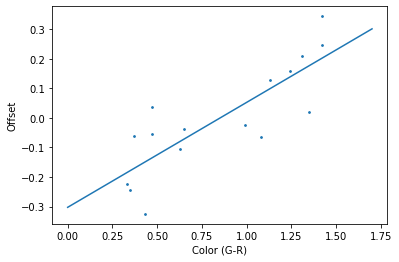

In [22]:
# Check color term

offset = []
color = []
for i in range(len(inst_mag)):
    offset.append(new_candle_g_mag[i] - (k * inst_mag[i] + b))
    color.append(new_candle_g_mag[i] - new_candle_r_mag[i])

color_k, color_b = np.polyfit(color, offset, 1)
fig, ax = plt.subplots()
x_ticks = np.linspace(0, 1.7, 100)
ax.scatter(color, offset, s=3)
ax.plot(x_ticks, x_ticks * color_k + color_b)
ax.set_xlabel("Color (G-R)")
ax.set_ylabel("Offset")
plt.show()

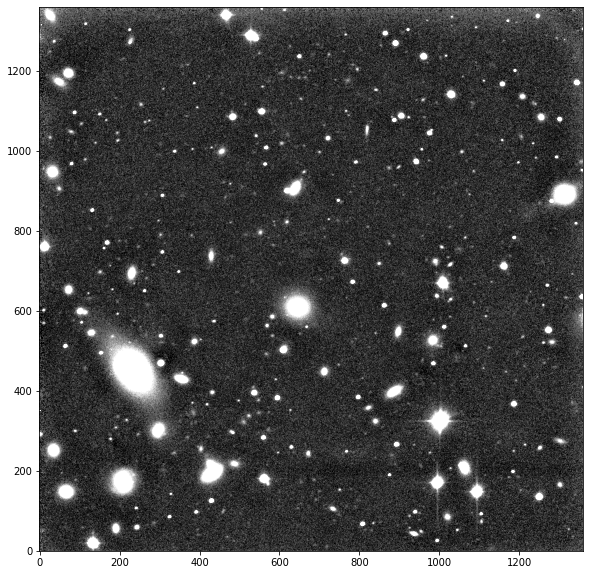

In [23]:
# Do photometry on galaxies

fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.imshow(image_v, origin='lower', cmap='Greys_r', vmin=np.median(image_v)-10, vmax=np.median(image_v)+50)

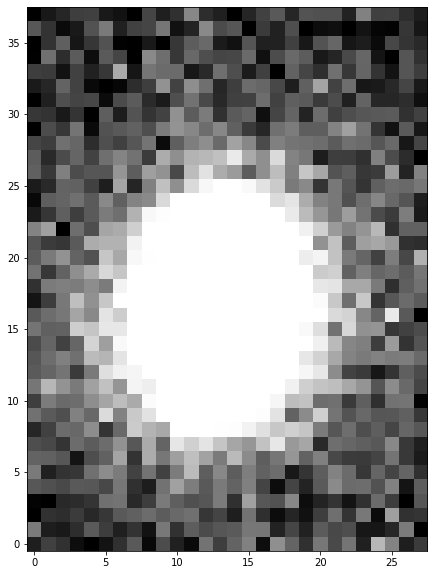

In [64]:
galaxy_is_elliptic = [False, True, True, False, False, None, True, True, True, True, True, True, True]


#galaxy_coords = [(1025, 1070, 810, 830),
#         (885, 926, 628, 660),
#         (90, 120, 720, 750),
#         (340, 370, 810, 840),
#         (265, 285, 1285, 1325),
#         (135, 220, 170, 255),
#         (710, 760, 410, 450),
#         (675, 720, 215, 250),
#         (860, 940, 1260, 1360),
#         (500, 550, 955, 1010),
#         (520, 580, 880, 920),
#         (370, 430, 850, 930),
#         (430, 480, 680, 730)]

galaxy_coords = [(1035, 1067, 813, 829),
         (886, 926, 627, 658),
         (95, 115, 723, 747),
         (347, 368, 812, 835),
         (267, 285, 1285, 1320),
         (135, 215, 170, 255),
         (715, 760, 420, 445),
         (675, 720, 215, 250),
         (860, 930, 1285, 1355),
         (510, 543, 965, 1000),
         (530, 570, 885, 910),
         (375, 420, 860, 920),
         (432, 470, 700, 728)]

fig, axs = plt.subplots(1, 1, figsize=(10, 10))
i = 12
axs.imshow(image_v[galaxy_coords[i][0]:galaxy_coords[i][1], galaxy_coords[i][2]:galaxy_coords[i][3]], origin='lower', cmap='Greys_r', vmin=np.median(image_v)-10, vmax=np.median(image_v)+50)

In [66]:
galaxy_mags = []
for bound_x1, bound_x2, bound_y1, bound_y2 in galaxy_coords:
    galaxy_count = np.sum(image_v[bound_x1:bound_x2, bound_y1:bound_y2])
    galaxy_inst_mag = -2.5 * np.log10(galaxy_count)
    galaxy_mag = galaxy_inst_mag * k + b
    galaxy_mags.append(galaxy_mag)

print(galaxy_mags)

[19.718290881361032, 15.75643870055907, 19.387997589121554, 19.875930904216688, 19.541661209179015, 14.981895812370748, 18.55194569964361, 17.30931621807986, 14.93146823483621, 17.023159501232186, 17.930045449075223, 16.632400246139238, 17.82696924861736]


In [26]:
print(color_k, color_b)

0.35492764574573576 -0.3025758179982332
